**Group Project Proposal Group 010-8**

**Introduction:**

The Data Science Salaries dataset, last updated on February 27th of this year, includes metrics on jobs in the Data Science industry from 2020 to 2022. We will use it to find the relationship between salaries, demographics, education, and experience levels,  for data science jobs. Data for this set was collected through industry surveys, job surveys, recruitment agencies, and company reports. For this project, we will answer the predictive question, “Can we predict the ideal location (employee residence) to work a data science job based on the highest yearly salary in USD, experience level, and job title?” using classification. We want to answer this question to give workers insight about which location is most ideal to work a certain job in terms of salary. 


**Preliminary Data Analysis:**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
ds_salaries <- read_csv("data/ds_salaries.csv") |>
    mutate(employee_residence = as_factor(employee_residence))

Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): id, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
slice(ds_salaries, 1:6)

id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In [4]:
en_data <- filter(ds_salaries, experience_level == "EN")
en_data

id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<chr>,<chr>
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
521,2022,EN,FT,Computer Vision Engineer,10000,USD,10000,PT,100,LU,M
600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M
601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M


In [5]:
mi_data <- filter(ds_salaries, experience_level == "MI")
mi_data

id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<chr>,<chr>
0,2020,MI,FT,Data Scientist,7.0e+04,EUR,79833,DE,0,DE,L
3,2020,MI,FT,Product Data Analyst,2.0e+04,USD,20000,HN,0,HN,S
7,2020,MI,FT,Data Scientist,1.1e+07,HUF,35735,HU,50,HU,L
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M
599,2022,MI,FT,Data Scientist,130000,USD,130000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [6]:
se_data <- filter(ds_salaries, experience_level == "SE")
se_data

id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<chr>,<chr>
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [7]:
en_split <- initial_split(en_data, prop = 0.75, strata = employee_residence)  
en_train <- training(en_split)   
en_test <- testing(en_split)

In [8]:
mi_split <- initial_split(mi_data, prop = 0.75, strata = employee_residence)  
mi_train <- training(mi_split)   
mi_test <- testing(mi_split)

In [39]:
se_split <- initial_split(se_data, prop = 0.75, strata = employee_residence)  
se_train <- training(se_split)   
se_test <- testing(se_split)

se_train
se_test

id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<chr>,<chr>
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>,<chr>,<chr>
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
588,2022,SE,FT,Data Analyst,99000,USD,99000,US,0,US,M
591,2022,SE,FT,Data Architect,144854,USD,144854,US,100,US,M
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M


In [16]:
clean_se_data <- clean_names(se_data)

se_counts <- se_train |>
    select(job_title, employee_residence) |>
    group_by(job_title, employee_residence) |>
    summarise(count = n()) |>
    arrange(desc(count)) 

se_counts

`summarise()` has grouped output by 'job_title'. You can override using the
`.groups` argument.


job_title,employee_residence,count
<chr>,<fct>,<int>
Data Engineer,US,42
Data Scientist,US,38
Data Analyst,US,31
⋮,⋮,⋮
Research Scientist,US,1
Research Scientist,PT,1
Staff Data Scientist,US,1


In [12]:
max(se_counts$count)

[1] 42

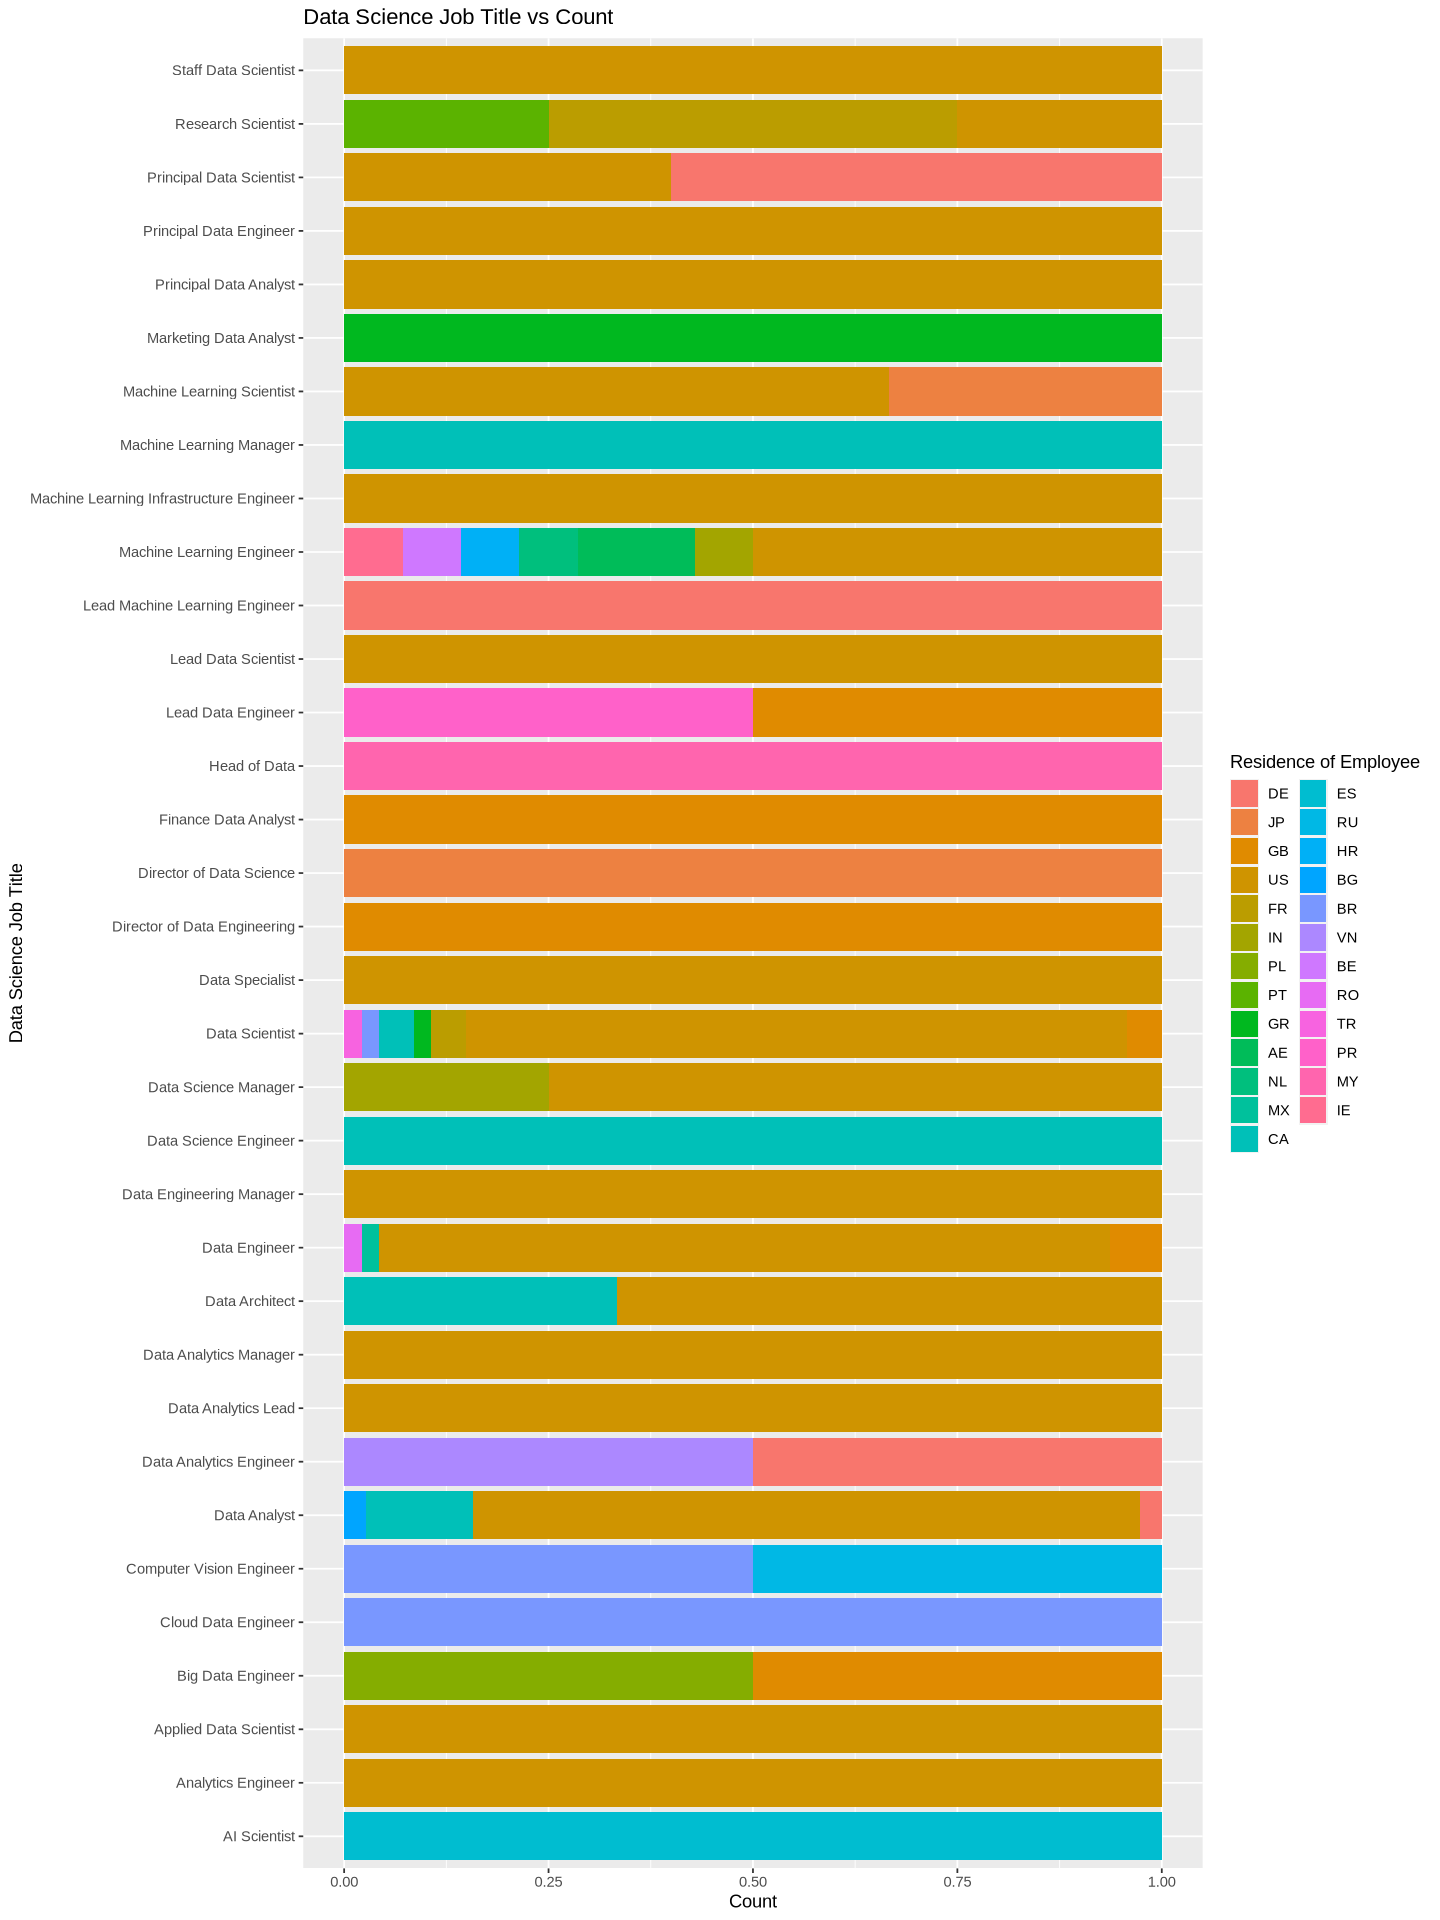

In [15]:
options(repr.plot.width = 12, repr.plot.height = 16) 

se_plot <- se_counts |>
    ggplot(aes(x = count, y = job_title, fill = employee_residence)) +
    geom_bar(stat = "identity", position = "fill") +
    labs(x= "Count", y = "Data Science Job Title", fill = "Residence of Employee", title = "Data Science Job Title vs Count")

se_plot

In [38]:
mean_salary_se <- se_train |>
    group_by(job_title, salary_in_usd, employee_residence) |>
    summarise(mean_salary = mean(salary_in_usd)) |>
    select(-salary_in_usd)

mean_salary_se

`summarise()` has grouped output by 'job_title', 'salary_in_usd'. You can
override using the `.groups` argument.
Adding missing grouping variables: `salary_in_usd`


salary_in_usd,job_title,employee_residence,mean_salary
<dbl>,<chr>,<fct>,<dbl>
55000,AI Scientist,ES,55000
184700,Analytics Engineer,US,184700
205300,Analytics Engineer,US,205300
⋮,⋮,⋮,⋮
93427,Research Scientist,FR,93427
144000,Research Scientist,US,144000
105000,Staff Data Scientist,US,105000


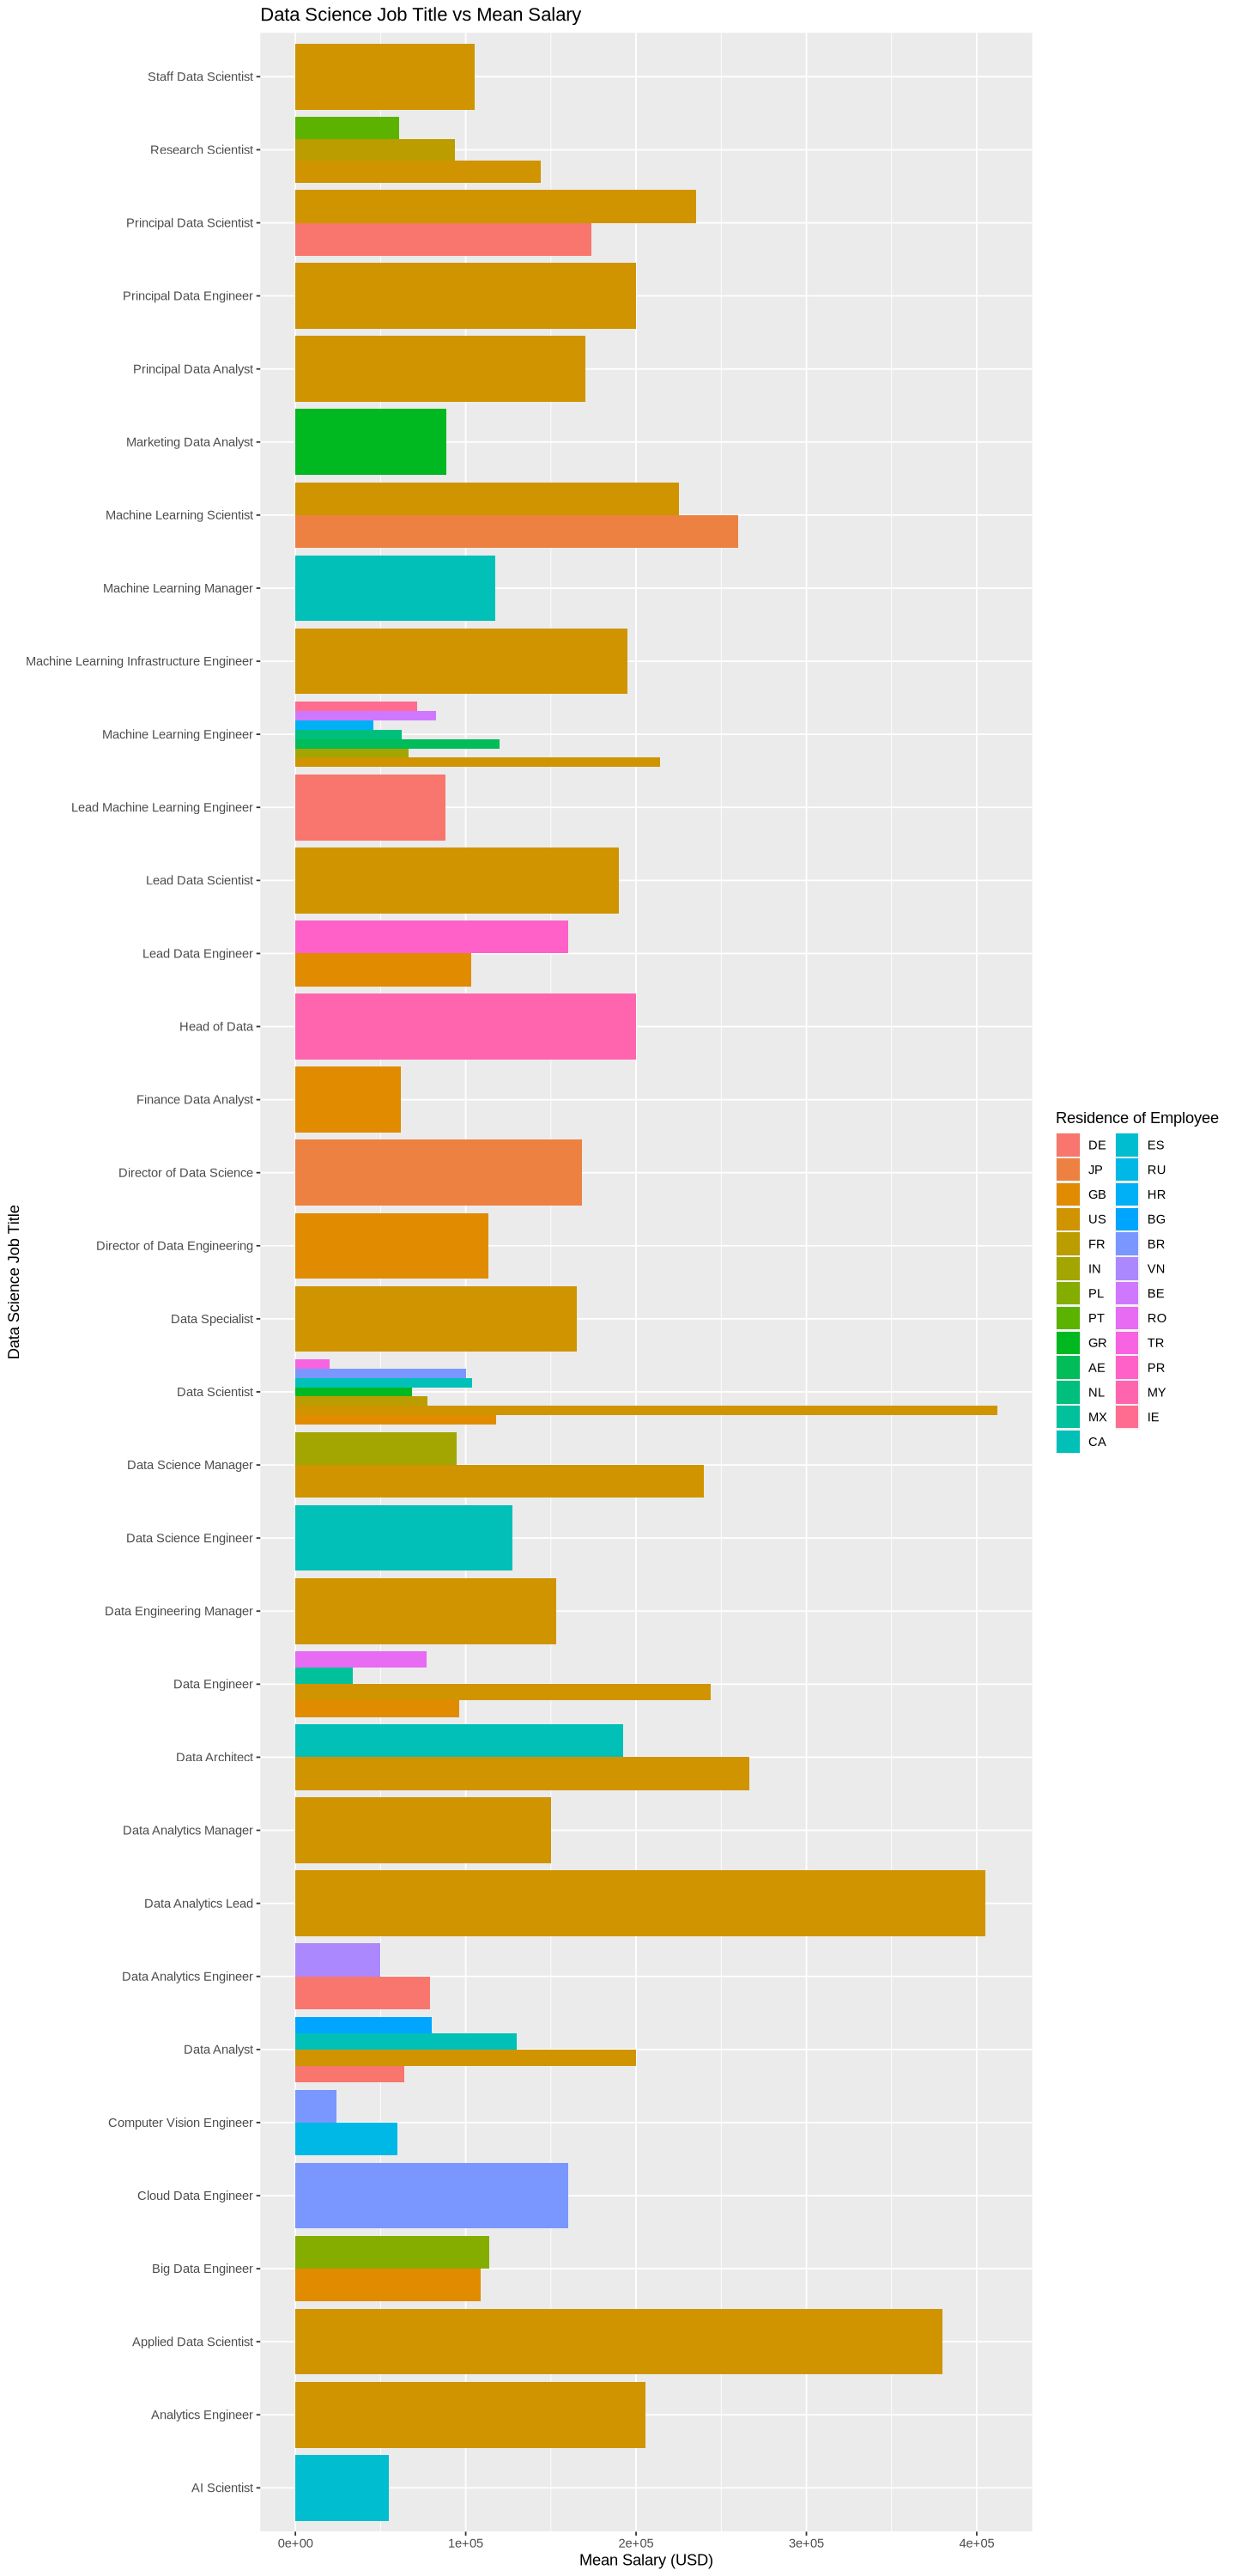

In [37]:
options(repr.plot.width = 12, repr.plot.height = 25) 

salary_plot <- mean_salary_se |>
    ggplot(aes(x = mean_salary, y = job_title, fill = employee_residence)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Mean Salary (USD)", y = "Data Science Job Title", fill = "Residence of Employee", 
         title = "Data Science Job Title vs Mean Salary") 

salary_plot

**Legend for Employee Residences:**
DE - Denmark / 
JP - Japan / 
GB - United Kingdown / 
US - United States / 
FR - France / 
IN - India  / 
PL - Poland / 
PT - Portugal / 
GR - Greece / 
AE - United Erab Emirates / 
NL - Netherlands / 
MX - Mexico / 
CA - Canada / 
ES - Spain / 
RU - Russia  / 
HR - Croatia / 
BG - Bulgaria / 
BR - Brazil / 
VN - Vietnam / 
BE - Belgium / 
RO - Romania / 
TR - Turkey / 
PR - Puerto Rico / 
MY - Malaysia / 
IE - Ireland

**Expected outcomes and significance:**

**What do you expect to find?**

We expect to find that the US offers the highest mean salary for data scientists due to the high number of tech successful start-ups and blue-chip companies based there, such as Apple, Amazon, and Microsoft. Furthermore, our preliminary data analysis shows that the US has the largest amount of counts.

**What impact could such findings have?**

By showing the trends of salary distribution among different locations, our findings could lead to a shift in the residing location of individuals going into senior level in the data science industry.  

**What future questions could this lead to?**

As a result of our data exploration, future questions could arise concerning factors beyond what is included in the variables of this data set, such as, “How is salary based on cost of living?”, or “How does access to education and resources affect salary?”, as well as more questions based on what is available in the dataset, such as “Is salary for the same job dependent on the location?”